In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("bank.xlsx")

In [3]:
df.head()

,age,job,marital,education,housing,loan,day_of_week,duration,Outcome
0,56.0,housemaid,married,basic.4y,no,no,mon,261.0,0
1,57.0,services,married,high.school,no,no,mon,149.0,0
2,37.0,services,married,high.school,yes,no,mon,226.0,0
3,40.0,admin.,married,basic.6y,no,no,mon,151.0,0
4,56.0,services,married,high.school,no,yes,mon,307.0,0


In [4]:
df.shape

(1306, 9)

In [5]:
df.describe()

,age,duration,Outcome
count,1301.000000,1303.000000,1306.000000
mean,41.753267,422.334612,0.250383
std,8.824607,400.708530,0.433399
min,22.000000,5.000000,0.000000
25%,35.000000,158.000000,0.000000
50%,41.000000,268.000000,0.000000
75%,48.000000,579.000000,0.750000
max,60.000000,3631.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1301 non-null   float64
 1   job          1306 non-null   object 
 2   marital      1301 non-null   object 
 3   education    1306 non-null   object 
 4   housing      1306 non-null   object 
 5   loan         1302 non-null   object 
 6   day_of_week  1306 non-null   object 
 7   duration     1303 non-null   float64
 8   Outcome      1306 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 92.0+ KB


In [10]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)
      

['job', 'marital', 'education', 'housing', 'loan', 'day_of_week']
['age', 'duration', 'Outcome']


In [11]:
df[cat].describe().T

,count,unique,top,freq
job,1306,11,blue-collar,357
marital,1301,3,married,880
education,1306,6,university.degree,387
housing,1306,2,no,671
loan,1302,2,no,1127
day_of_week,1306,5,tue,446


# unique values for categorical data

In [12]:
for column in df.columns:
    if df[column].dtype=="object":
        print(column.upper(),': ' ,df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

JOB :  11
student           16
unemployed        27
self-employed     33
retired           38
housemaid         42
entrepreneur      48
management       106
technician       181
services         188
admin.           270
blue-collar      357
Name: job, dtype: int64


MARITAL :  3
divorced    143
single      278
married     880
Name: marital, dtype: int64


EDUCATION :  6
basic.6y               115
professional.course    137
basic.4y               168
basic.9y               204
high.school            295
university.degree      387
Name: education, dtype: int64


HOUSING :  2
yes    635
no     671
Name: housing, dtype: int64


LOAN :  2
yes     175
no     1127
Name: loan, dtype: int64


DAY_OF_WEEK :  5
thu     56
fri     81
wed    309
mon    414
tue    446
Name: day_of_week, dtype: int64




# Exploratory Data Analysis

# find missing values

In [13]:
df.isnull().sum()

age            5
job            0
marital        5
education      0
housing        0
loan           4
day_of_week    0
duration       3
Outcome        0
dtype: int64

In [14]:
df1 = df.dropna()
df1.isnull().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
day_of_week    0
duration       0
Outcome        0
dtype: int64

In [15]:
# check for duplicate data

dups = df.duplicated()
print("number of duplicated rows = %d" % (dups.sum()))
      
df[dups]

number of duplicated rows = 0


,age,job,marital,education,housing,loan,day_of_week,duration,Outcome


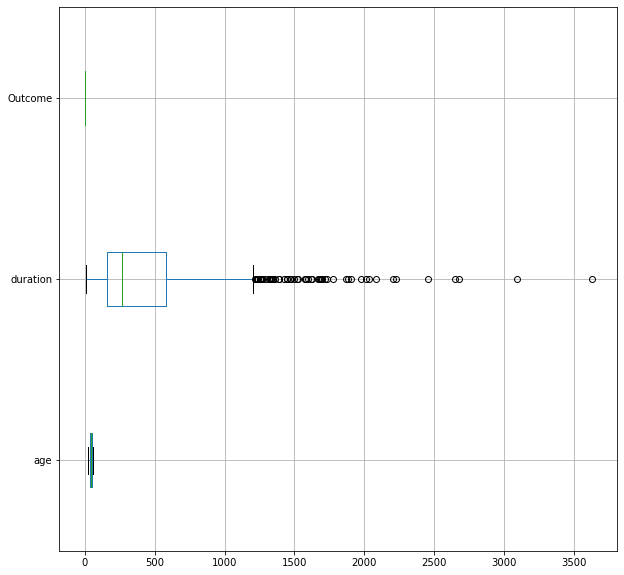

In [14]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [35]:
#### get_dummies of the object variables

In [16]:
print(cat)

['job', 'marital', 'education', 'housing', 'loan', 'day_of_week']


Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity . This is done to ensure that we do not land in to dummy trap.

In [17]:
df1.head()

,age,job,marital,education,housing,loan,day_of_week,duration,Outcome
0,56.0,housemaid,married,basic.4y,no,no,mon,261.0,0
1,57.0,services,married,high.school,no,no,mon,149.0,0
2,37.0,services,married,high.school,yes,no,mon,226.0,0
3,40.0,admin.,married,basic.6y,no,no,mon,151.0,0
4,56.0,services,married,high.school,no,yes,mon,307.0,0


In [18]:
df1['marital'].value_counts()

married     871
single      276
divorced    143
Name: marital, dtype: int64

In [19]:
df1.marital = pd.Categorical(df1.marital).codes

C:\anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df1.head()

,age,job,marital,education,housing,loan,day_of_week,duration,Outcome
0,56.0,housemaid,1,basic.4y,no,no,mon,261.0,0
1,57.0,services,1,high.school,no,no,mon,149.0,0
2,37.0,services,1,high.school,yes,no,mon,226.0,0
3,40.0,admin.,1,basic.6y,no,no,mon,151.0,0
4,56.0,services,1,high.school,no,yes,mon,307.0,0


In [21]:
df1['marital'].value_counts()

1    871
2    276
0    143
Name: marital, dtype: int64

In [22]:
df1=pd.get_dummies(df1, columns=['marital'],prefix='Status:',drop_first= True)

In [67]:
df1.head()

,age,job,housing,loan,day_of_week,duration,Outcome,Status:_1,Status:_2,Status:_1,Status:_2,Status:_3,Status:_4,Status:_5
0,56.0,housemaid,0,0,mon,261.0,0,1,0,0,0,0,0,0
1,57.0,services,0,0,mon,149.0,0,1,0,0,0,1,0,0
2,37.0,services,1,0,mon,226.0,0,1,0,0,0,1,0,0
3,40.0,admin.,0,0,mon,151.0,0,1,0,1,0,0,0,0
4,56.0,services,0,1,mon,307.0,0,1,0,0,0,1,0,0


In [68]:
df1.housing = pd.Categorical(df1.housing).codes
df1.loan = pd.Categorical(df1.loan).codes
df1.head()

,age,job,housing,loan,day_of_week,duration,Outcome,Status:_1,Status:_2,Status:_1,Status:_2,Status:_3,Status:_4,Status:_5
0,56.0,housemaid,0,0,mon,261.0,0,1,0,0,0,0,0,0
1,57.0,services,0,0,mon,149.0,0,1,0,0,0,1,0,0
2,37.0,services,1,0,mon,226.0,0,1,0,0,0,1,0,0
3,40.0,admin.,0,0,mon,151.0,0,1,0,1,0,0,0,0
4,56.0,services,0,1,mon,307.0,0,1,0,0,0,1,0,0


In [70]:
df2 = df1.drop(['job','day_of_week'],axis = 1)
df2.head()

,age,housing,loan,duration,Outcome,Status:_1,Status:_2,Status:_1,Status:_2,Status:_3,Status:_4,Status:_5
0,56.0,0,0,261.0,0,1,0,0,0,0,0,0
1,57.0,0,0,149.0,0,1,0,0,0,1,0,0
2,37.0,1,0,226.0,0,1,0,0,0,1,0,0
3,40.0,0,0,151.0,0,1,0,1,0,0,0,0
4,56.0,0,1,307.0,0,1,0,0,0,1,0,0


## Outlier Checks

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

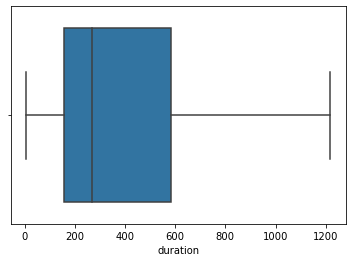

In [122]:
sns.boxplot(df1['duration'])

## outlier treatment

In [72]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [73]:
lr,ur = remove_outlier(df1['duration'])
print(lr)
print(ur)

-477.75
1218.25


In [74]:
lr,ur = remove_outlier(df1['duration'])
df1['duration'] = np.where(df1['duration']>ur, ur, df1['duration'])
df1['duration'] = np.where(df1['duration']<lr, lr, df1['duration'])

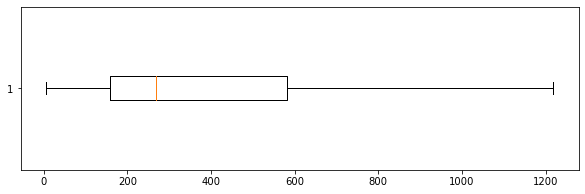

In [75]:
plt.figure(figsize=(10,3))
plt.boxplot(df1['duration'], vert = False);

# Building a Logistic Regression mode

### Train Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df2.drop('loan',axis=1),
                                                 df2['loan'], test_size =0.30,
                                                 random_state = 101)

In [108]:
y_test.head()

1115    1
1089    1
369     0
1109    0
21      0
Name: loan, dtype: int8

In [109]:
y_test.shape

(387,)

### Training and Predicting

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
logmodel = LogisticRegression()

In [112]:
logmodel.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
prediction = logmodel.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
accuracy=confusion_matrix(y_test,prediction)

In [116]:
accuracy

array([[341,   0],
       [ 46,   0]], dtype=int64)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy=accuracy_score(y_test,prediction)
accuracy

0.8811369509043928

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       341
           1       0.00      0.00      0.00        46

    accuracy                           0.88       387
   macro avg       0.44      0.50      0.47       387
weighted avg       0.78      0.88      0.83       387



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
